In [1]:
from transformers import BertTokenizer, BertModel
import torch

We need a tokenizer and a model; we then pass the tokens to the model

In [2]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

input_text = '''
After a long day at work, Sarah decided to relax by taking her
dog for a walk in the park. As they strolled along the
tree-lined paths, Sarah's dog, Max, eagerly sniffed around,
chasing after squirrels and birds. Sarah smiled as she watched
Max enjoy himself, feeling grateful for the companionship and
joy that her furry friend brought into her life.
'''

As we pass the tokens to the model, we can take a peek in the model's output embeddings.

In [3]:
tokens = tokenizer(input_text, return_tensors='pt')

with torch.no_grad():
    outputs = model(**tokens)

last_hidden_states = outputs.last_hidden_state

In [ ]:
print("Token embeddings")

for token, embedding in zip(tokens['input_ids'][0], last_hidden_states[0]):
    word = tokenizer.decode(int(token))
    print(f'{word}: {embedding[:3]}')

The embeddings are high-dimensional (728 elements vectors). It would be interesting to visualize the way the model "extracts" the semantic meaning from the input by looking at how the embeddings for each token cluster together based on that meaning.

The issue is that it is difficult to visualize the clustering of high-dimensional vectors. We then use a technique for dimansionality reduction called **t-SNE (t-Distributed Stochastic Neighbour Embedding)** to reduce the embedding vectors to just 2 dimensions, so we can plot them.

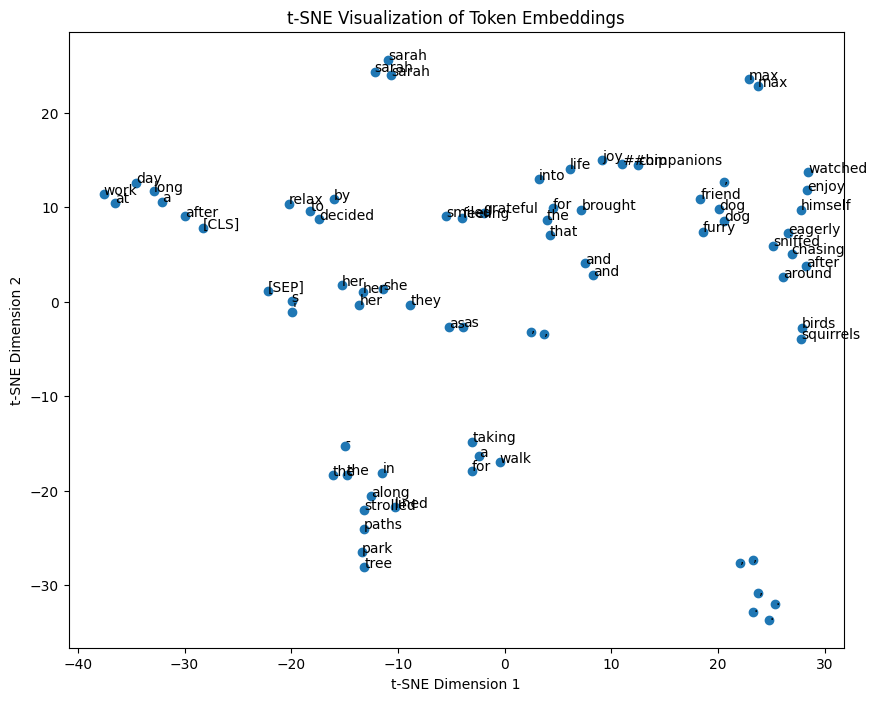

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=5, random_state=42)
embeddings_tsne = tsne.fit_transform(last_hidden_states[0])

plt.figure(figsize=(10, 8))
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], marker='o')

for i, word in enumerate(tokenizer.convert_ids_to_tokens(tokens['input_ids'][0])):
    plt.annotate(word, xy=(embeddings_tsne[i, 0], embeddings_tsne[i, 1]), fontsize=10)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Token Embeddings')

plt.show()

We can also take a look at the _positional embeddings_

In [7]:
# access the embeddings layer directly
embeddings = model.embeddings

# extract positional embeddings for the input tokens
positional_embeddings = embeddings.position_embeddings.weight
position_ids = torch.arange(tokens['input_ids'].size(1), dtype=torch.long).unsqueeze(0)
input_positional_embeddings = positional_embeddings[position_ids]

print(f'Positional embeddings shape: {input_positional_embeddings.shape}')

print('Positional embeddings for each token:')
for token_id, pos_embedding in zip(tokens['input_ids'][0], input_positional_embeddings[0]):
  token = tokenizer.decode([token_id])
  print(f'Token {token}: {pos_embedding[:5]}')


Positional embeddings shape: torch.Size([1, 77, 768])
Positional embeddings for each token:
Token [CLS]: tensor([ 0.0175, -0.0256, -0.0366, -0.0253,  0.0080], grad_fn=<SliceBackward0>)
Token after: tensor([ 0.0078,  0.0023, -0.0194, -0.0171, -0.0132], grad_fn=<SliceBackward0>)
Token a: tensor([-0.0113, -0.0020, -0.0116, -0.0217, -0.0101], grad_fn=<SliceBackward0>)
Token long: tensor([-0.0042, -0.0119, -0.0212, -0.0093, -0.0102], grad_fn=<SliceBackward0>)
Token day: tensor([-0.0056, -0.0104, -0.0072, -0.0027, -0.0150], grad_fn=<SliceBackward0>)
Token at: tensor([-0.0031, -0.0190, -0.0189, -0.0148, -0.0158], grad_fn=<SliceBackward0>)
Token work: tensor([ 0.0064, -0.0177, -0.0221, -0.0039, -0.0063], grad_fn=<SliceBackward0>)
Token ,: tensor([ 0.0006, -0.0161, -0.0076, -0.0079, -0.0093], grad_fn=<SliceBackward0>)
Token sarah: tensor([ 0.0020, -0.0146, -0.0146, -0.0075, -0.0106], grad_fn=<SliceBackward0>)
Token decided: tensor([ 0.0064, -0.0034, -0.0165,  0.0059, -0.0121], grad_fn=<SliceBac